## Cracow trams delays


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from scikitplot.estimators import plot_learning_curve

%matplotlib inline

Loading data for 7 days

I convert 'vehicleId' to string, because in the automaticly obtained type (float64) id was rounded, as a result of which there were only 2 unique vehicleId (which is not correct!). np.Int64 could not be used yet because of missing values.
There was no problem with 'tripId' - that`s probably because of NaN values in 'vehicleId' and fullfiled in 'tripId'.

In [2]:
%%time

df23 = pd.read_csv('report_07-23.csv', dtype={'vehicleId': str})
df24 = pd.read_csv('report_07-24.csv', dtype={'vehicleId': str})
df25 = pd.read_csv('report_07-25.csv', dtype={'vehicleId': str})
df26 = pd.read_csv('report_07-26.csv', dtype={'vehicleId': str})
df27 = pd.read_csv('report_07-27.csv', dtype={'vehicleId': str})
df30 = pd.read_csv('report_07-30.csv', dtype={'vehicleId': str})
df31 = pd.read_csv('report_07-31.csv', dtype={'vehicleId': str})

trams = pd.concat( [ df23, df24, df25, df26, df27, df30, df31 ] )

Wall time: 1min 3s


In [3]:
trams.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6352185295672180871,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6352185295672180943,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6352185295672181360,6351558574044592386,STOPPING,0,15.0


Example tram route (journey)


In [4]:
trams[ trams.tripId == 6351558574044883205]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


Delay column is the delay given in minutes. 

In [5]:
pd.DataFrame(zip(trams.delay.value_counts(), trams.delay.value_counts(normalize=True)), columns = ['value_counts','percent'])

,value_counts,percent
0,215844,0.426947
1,177463,0.351028
2,58743,0.116196
3,28027,0.055438
4,13186,0.026082
5,6047,0.011961
6,2762,0.005463
7,1501,0.002969
8,785,0.001553
9,500,0.000989


Most of trams (42%) are on time, 1/3 (35%) has the 1 minute delay.
* **Arrivals ahead of time have not been marked**

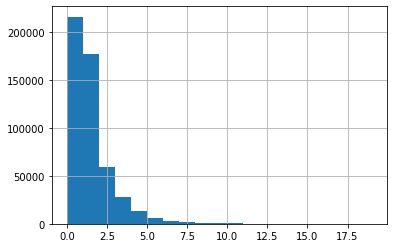

In [6]:
trams.delay.hist(bins=19);

Dalays have a long tail on the right. Most trams arrive on time or slightly late.

In [7]:
trams.delay.describe()

count    505552.000000
mean          1.004029
std           1.310555
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          19.000000
Name: delay, dtype: float64

I create a column of **delays in seconds** to easily interpret the accuracy of the model. 'delay_seconds' will be the new target (y).

In [8]:
trams['delay_seconds'] = trams['delay'].apply(lambda x: x * 60)

In [9]:
trams = trams.drop('index', axis = 1 )

Categorizing object column: direction

In [10]:
directions = list(trams['direction'].unique())
print(directions)

['Kopiec Wandy', 'Walcownia', 'Czerwone Maki P+R', 'Wzgórza K.', 'Bronowice Małe', 'Salwator', 'Mały Płaszów', 'Os.Piastów', 'Mistrzejowice', 'Bronowice', 'Kurdwanów P+R', 'Nowy Bieżanów P+R', 'Krowodrza Górka', 'Cichy Kącik', 'Borek Fałęcki', 'Dworzec Tow.', 'Prokocim', 'Łagiewniki', 'Cm. Rakowicki', 'Kombinat', 'Plac Centralny im.R.Reagana']


In [11]:
trams['direction_cat'] = trams['direction'].factorize()[0]

Wheather a stopName is a tram loop

In [12]:
trams['is_loop'] = trams['stopName'].apply(lambda x: 1 if x in directions else 0)

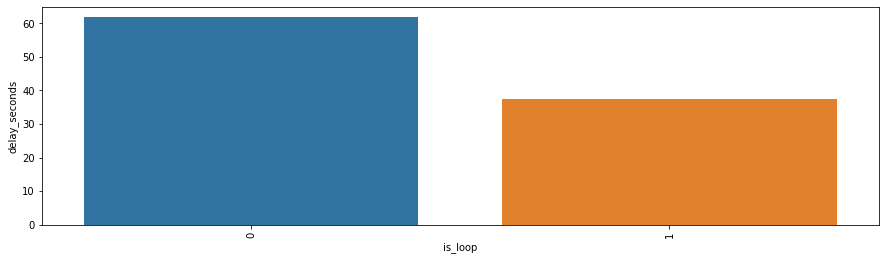

In [13]:
plt.figure(figsize=(15, 4))
sns.barplot(x="is_loop", y="delay_seconds", data=trams, ci=None)
plt.xticks(rotation=90);

In [14]:
trams['is_loop'].value_counts()

0    473194
1     32358
Name: is_loop, dtype: int64

'is_loop' may be a feature that affects the result if the number of such stops is not too small

#### Missing values

In [15]:
trams.isnull().sum()

time_stamp           0
stop                 0
stopName             0
number               0
direction            0
plannedTime          0
vehicleId        58740
tripId               0
status               0
delay                0
seq_num           4735
delay_seconds        0
direction_cat        0
is_loop              0
dtype: int64

Filling missing values with -1 as an unique value. (for not removing 58740 rows and be able to convert column to a int type)

In [16]:
#trams['vehicleId'].unique()
trams['vehicleId'].fillna('-1', inplace = True)
trams['vehicleId'] = trams['vehicleId'].astype(np.int64)

trams['seq_num'].fillna(-1, inplace = True)

In [17]:
trams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505552 entries, 0 to 72416
Data columns (total 14 columns):
time_stamp       505552 non-null object
stop             505552 non-null int64
stopName         505552 non-null object
number           505552 non-null int64
direction        505552 non-null object
plannedTime      505552 non-null object
vehicleId        505552 non-null int64
tripId           505552 non-null int64
status           505552 non-null object
delay            505552 non-null int64
seq_num          505552 non-null float64
delay_seconds    505552 non-null int64
direction_cat    505552 non-null int64
is_loop          505552 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 67.9+ MB


Dates - plannedTime

In [18]:
trams['plannedTime'] = pd.to_datetime( trams['plannedTime'] )
trams[['plannedTime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505552 entries, 0 to 72416
Data columns (total 1 columns):
plannedTime    505552 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.7 MB


In [19]:
trams['planned_hour'] = trams['plannedTime'].dt.hour

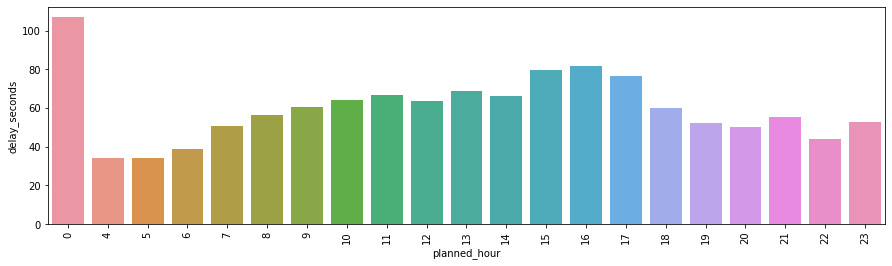

In [20]:
plt.figure(figsize=(15, 4))
sns.barplot(x="planned_hour", y="delay_seconds", data=trams, ci=None)
plt.xticks(rotation=90);

Plus number_direction & stop_direction columns

In [21]:
trams['number_direction'] = trams.apply( lambda x: '{} {}'.format( x['number'], x['direction']), axis = 1 ).factorize()[0]
trams['stop_direction'] = trams.apply( lambda x: '{} {}'.format( x['number'], x['stop']), axis = 1 ).factorize()[0]

Are trams on short routes more punctual than on long ones?

In [22]:
trams['max_seq'] = trams.groupby(['number_direction'])['seq_num'].transform(max)

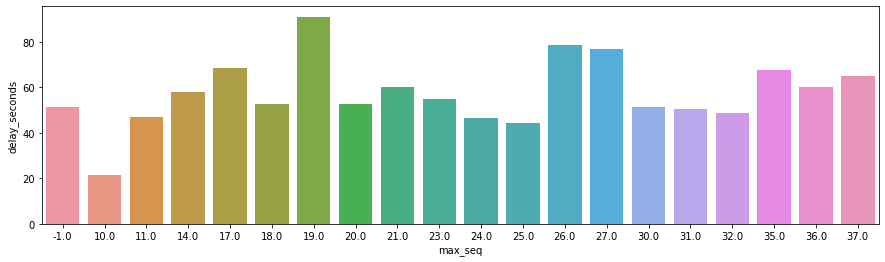

In [23]:
plt.figure(figsize=(15,4))
sns.barplot(x='max_seq', y='delay_seconds', data = trams, ci=None);

Does not look like a linear relationship, but can be checked.

In [24]:
trams.sample(3)

,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num,delay_seconds,direction_cat,is_loop,planned_hour,number_direction,stop_direction,max_seq
54982,2018-07-25 18:23:45,569,Limanowskiego,13,Nowy Bieżanów P+R,2018-07-25 18:22:00,-1,6351558574044670735,PLANNED,1,16.0,60,11,0,18,22,154,27.0
30858,2018-07-24 12:31:14,824,Borek Fałęcki I,8,Borek Fałęcki,2018-07-24 12:28:00,6352185295672181352,6351558574044580361,PREDICTED,3,26.0,180,14,0,12,25,378,26.0
16431,2018-07-27 08:59:39,3176,Kurdwanów P+R,24,Bronowice Małe,2018-07-27 08:58:00,-1,6351558574046764294,PLANNED,1,1.0,60,4,1,8,7,363,27.0


In [25]:
trams.columns

Index(['time_stamp', 'stop', 'stopName', 'number', 'direction', 'plannedTime',
       'vehicleId', 'tripId', 'status', 'delay', 'seq_num', 'delay_seconds',
       'direction_cat', 'is_loop', 'planned_hour', 'number_direction',
       'stop_direction', 'max_seq'],
      dtype='object')

A backup, before I make a mess.

In [26]:
trams_copy = trams.copy(deep = True)

In [27]:
trams_copy = trams_copy.drop(['time_stamp', 'stopName', 'direction', 'plannedTime', 'tripId', 'status', 'delay'], axis = 1)

tripId, Status not included in X, because:
* tripId is only known when the tram has already started,
* Status is not knowed while starting also.

In [28]:
trams_copy.sample(3)

,stop,number,vehicleId,seq_num,delay_seconds,direction_cat,is_loop,planned_hour,number_direction,stop_direction,max_seq
66764,70,19,6352185295672181137,1.0,0,14,0,21,21,511,19.0
50736,320,20,6352185295672181154,18.0,120,13,0,17,15,222,18.0
7848,621,6,6352185295672181193,13.0,60,10,0,7,31,279,20.0


In [29]:
features = [ 
            'stop', 
            'number' , 
            'direction_cat', 
            'vehicleId', 
            'seq_num', 
            #'number_direction', #proved to be not very useful
            #'stop_direction', 
            'planned_hour',
            #'is_loop' 
            'max_seq'
           ] 

X = trams_copy[ features ].values
y = trams_copy['delay_seconds'].values

In [30]:
X.shape, y.shape

((505552, 7), (505552,))

In [31]:
model = DecisionTreeRegressor( max_depth=10, random_state = 2019 )
scores = cross_val_score( model, X, y, cv=5, scoring = 'neg_mean_absolute_error' )

'Error in seconds: {}, std in seconds: {}'.format( np.mean(scores), np.std(scores) ) 

'Error in seconds: -46.57224630874568, std in seconds: 1.3905467147133046'

#### By this simple model we can predict trams delays with an average of 46.57 seconds exactness.
More data probably could help.

Feature importances:

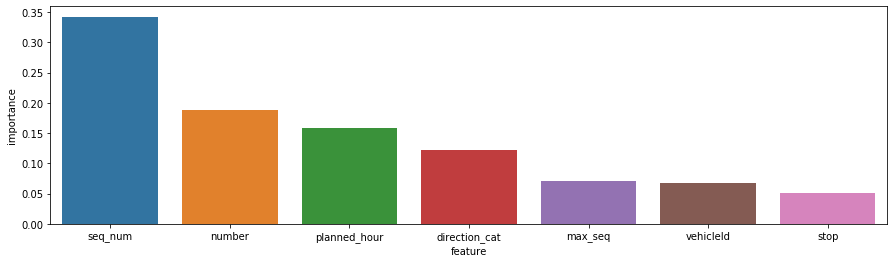

In [32]:
feat = pd.DataFrame(
                    zip(features, model.fit(X,y).feature_importances_), columns=['feature', 'importance']
                    ).sort_values(by='importance', ascending = False)

plt.figure(figsize=(15, 4))
sns.barplot(x = 'feature', y = 'importance', data=feat, ci = None);